In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/Language_Detection.csv')
print("Column names: ",data.columns)
print("\nView samples: ",data.head())

Column names:  Index(['Text', 'Language'], dtype='object')

View samples:                                                  Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [3]:
# Check the missing values
print(data.isnull().sum())

# drop rows with nulls
data.dropna(inplace=True)

# features and labels
x = data['Text']
y = data['Language']

Text        0
Language    0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_vectorized = tfidf.fit_transform(x)

In [6]:
print(f"Vectorized text shape: {X_vectorized.shape}")
print(f"Encoded labels: {set(y_encoded)}")

Vectorized text shape: (10337, 66927)
Encoded labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

In [9]:
# Train the model
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [11]:
print(f"Accuracy: {accuracy * 100:.4f}%")
print("\nClassification Report:\n",classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 84.3327%

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       1.00      0.22      0.36        73
       Dutch       0.98      0.43      0.60       111
     English       0.49      1.00      0.65       291
      French       0.98      0.98      0.98       219
      German       1.00      0.13      0.23        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      1.00      1.00        10
     Italian       1.00      0.70      0.83       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.99      1.00       121
  Portugeese       0.99      0.89      0.94       144
     Russian       1.00      1.00      1.00       136
     Spanish       0.99      0.92      0.95       160
    Sweedish       0.94      0.80      0.86       133
       Tamil       1.00      1.00      1.00        87
     Turkish       1.00      0.84    

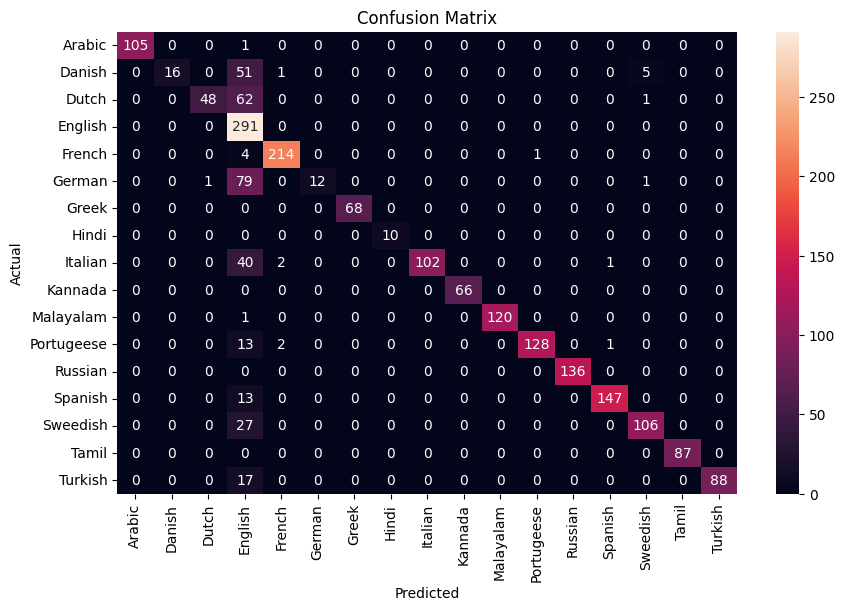

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
def detect_language(text):
    vector = tfidf.transform([text])  # Vectorize input
    prediction = model.predict(vector)  # Predict label
    return le.inverse_transform(prediction)[0]  # Decode label

# user Input and prediction
input_text = input("Enter text to detect language: ")
detected_language = detect_language(input_text)
print(f"Detected Language: {detected_language}")

Detected Language: English


In [14]:
import joblib

# Save model and vectorizer
joblib.dump(model, '../models/language_detector_model.pkl')
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')
joblib.dump(le, '../models/label_encoder.pkl')

['../models/label_encoder.pkl']